In [5]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [8]:
results = pd.read_pickle('results_strategy_2a_2008-2018.pickle')
returns = results.returns

In [10]:
m = returns.mean()
sd = returns.std()

In [11]:
m, sd

(0.0008019038166596344, 0.015689970398624412)

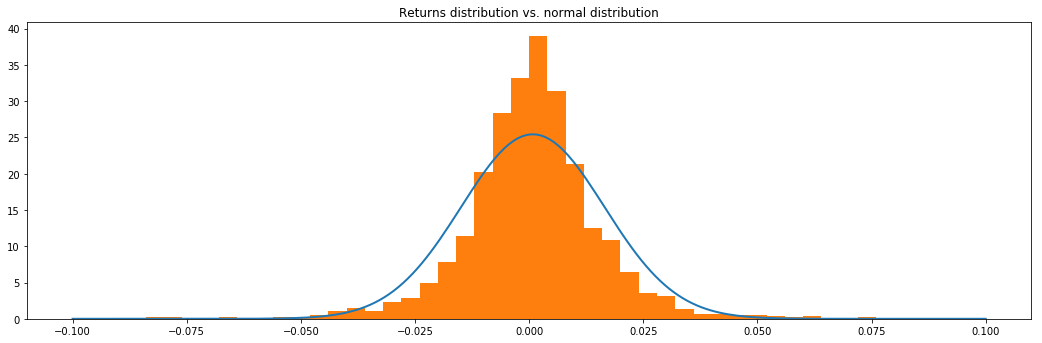

In [37]:
normal_distribution = norm(loc=m, scale=sd)
x = np.linspace(-.1, .1, 200)
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(211)
ax.plot(x, normal_distribution.pdf(x), '-', lw=2)
ax.hist(returns, bins=50, range=(-.1, .1), density=True)
plt.title('Returns distribution vs. normal distribution')
plt.show()

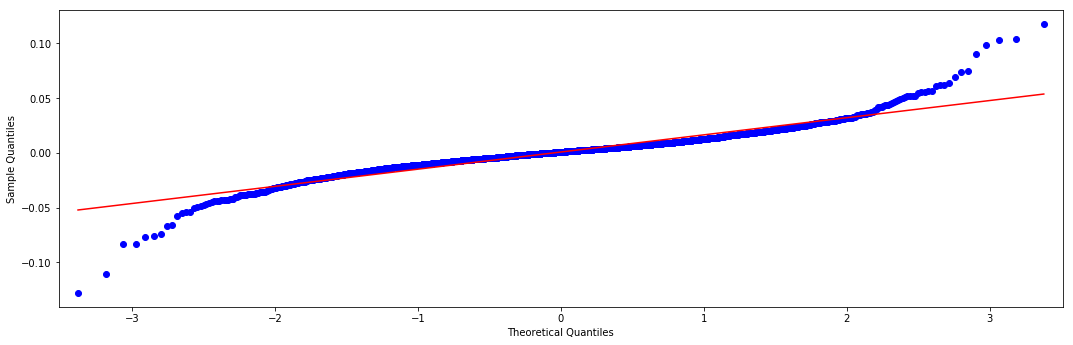

In [46]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(211)
qqplot(returns, line='s', ax=ax)
plt.show()

In [47]:
# Shapiro-Wilk Test
from scipy.stats import shapiro
# normality test
stat, p = shapiro(returns)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.916, p=0.000
Sample does not look Gaussian (reject H0)


In [50]:
# D'Agostino and Pearson's Test
from scipy.stats import normaltest

# normality test
stat, p = normaltest(returns)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=436.593, p=0.000
Sample does not look Gaussian (reject H0)


In [51]:
# Anderson-Darling Test
from scipy.stats import anderson

# normality test
result = anderson(returns)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 38.578
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.090, data does not look normal (reject H0)
